In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
data = pd.read_csv(url, header=None)

# Print the number of rows before removing duplicates
print("Number of rows before removing duplicates:", data.shape[0])

In [3]:
# Remove duplicates
data.drop_duplicates(inplace=True)

# Print the number of rows after removing duplicates
print("Number of rows after removing duplicates:", data.shape[0])

In [4]:
# Split into features (X) and labels (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Preprocess the data (standardize the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=50)  # choose the number of principal components to keep
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [8]:
# Train the KNN model
kValue = 5
knn = KNeighborsClassifier(n_neighbors=kValue)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier()

Accuracy: 0.8919239904988123
Precision: 0.9036144578313253
Recall: 0.8356545961002786
F1 score: 0.8683068017366138


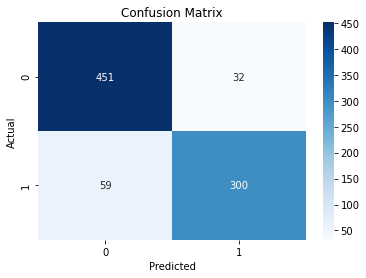

In [9]:
# Evaluate the model
import seaborn as sns

y_pred = knn.predict(X_test_pca)
print("KNN Model Accuracy:", accuracy_score(y_test, y_pred))
print("KNN Model Precision:", precision_score(y_test, y_pred))
print("KNN Model Recall:", recall_score(y_test, y_pred))
print("KNN Model F1 score:", f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Evaluate the model using confusion matrix

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()